In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)
        if filename == "train.csv":
            titanic_train = pd.read_csv(file)
        elif filename == "test.csv":
            titanic_test = pd.read_csv(file)


        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

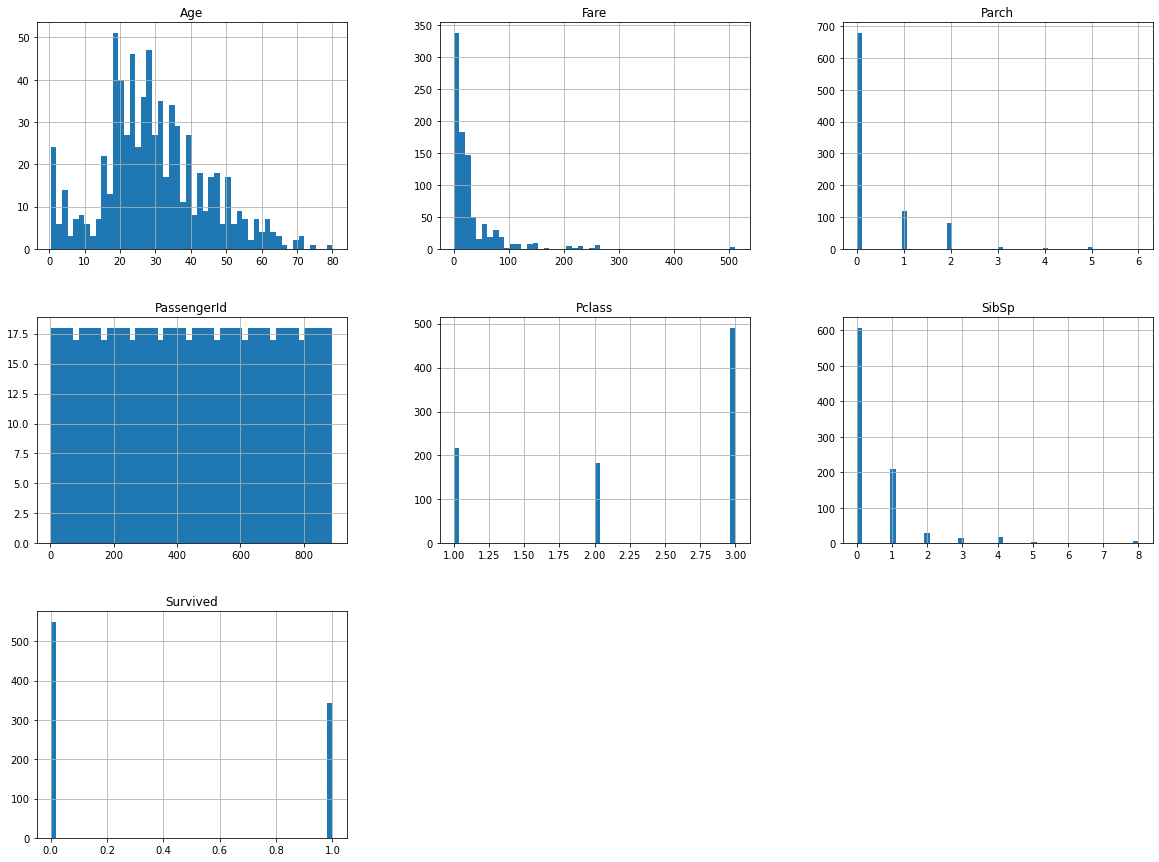

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_train.hist(bins=50, figsize=(20,15))
plt.show()

In [3]:
#Check what attributes are objects and which are ints
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#Gets rid of Name and Cabin because they are either incomplete or irrelevant information
titanic_label = titanic_train.drop(columns=["Name", "Cabin", "Ticket", "Fare"], axis=1)
titanic_trains = titanic_label.drop(columns=["Survived"], axis = 1)
titanic_tests = titanic_test.drop(columns=["Name","Cabin", "Ticket", "Fare"], axis=1)
#The Titanic embarked from Southampton with 2200 people so I set NA values to S because most people left from there
titanic_trains["Embarked"].fillna("S", inplace=True)
titanic_tests["Embarked"].fillna("S", inplace=True)


titanic_trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [6]:
titanic_trains.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked
0            1       3    male  22.0      1      0        S
1            2       1  female  38.0      1      0        C
2            3       3  female  26.0      0      0        S
3            4       1  female  35.0      1      0        S
4            5       3    male  35.0      0      0        S

In [7]:
#this cell breaks up all people in each class on the titanic
#then finds the average age for a person in each class
first = []
sumf = 0
second = []
sums = 0
third = []
sumt = 0
for i in range (len(titanic_trains["Pclass"])):
    if titanic_trains["Pclass"][i] == 1:
        first.append(titanic_trains["Age"][i])
    elif titanic_trains["Pclass"][i] == 2:
        second.append(titanic_trains["Age"][i])
    elif titanic_trains["Pclass"][i] == 3:
        third.append(titanic_trains["Age"][i])

for i in first:
    try:
        sumf += int(i)
    except:
        pass
for i in second:
    try:
        sums += int(i)
    except:
        pass
for i in third:
    try:
        sumt += int(i)
    except:
        pass
    
fage = sumf / len(first)
sage = sums / len(second)
tage = sumt / len(third)
    
fage = round(fage, 2)
sage = round(sage,2)
tage = round(tage,2)        
print(fage, sage, tage)

32.92 28.07 18.16


In [8]:
#Fills the age value in with the average age for your class aboard the ship
#Average age increases significantly as you move from 3rd to 1st class
titan = titanic_trains[titanic_trains.isnull().any(axis=1)].head()
titan.head()
for i in range(len(titanic_trains["Pclass"])):
    if titanic_trains["Pclass"][i] == 1:
        try:
            num = int(titanic_trains["Age"][i])
        except:
            titanic_trains["Age"][i] = fage
    elif titanic_trains["Pclass"][i] == 2:
        try:
            num = int(titanic_trains["Age"][i])
        except:
            titanic_trains["Age"][i] = sage
    else:
        try:
            num = int(titanic_trains["Age"][i])
        except:
            titanic_trains["Age"][i] = tage
            
            
for i in range(len(titanic_tests["Pclass"])):
    if titanic_tests["Pclass"][i] == 1:
        try:
            num = int(titanic_tests["Age"][i])
        except:
            titanic_tests["Age"][i] = fage
    elif titanic_tests["Pclass"][i] == 2:
        try:
            num = int(titanic_tests["Age"][i])
        except:
            titanic_tests["Age"][i] = sage
    else:
        try:
            num = int(titanic_tests["Age"][i])
        except:
            titanic_tests["Age"][i] = tage
titanic_trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/py

In [9]:
#Converts the Objects for Sex into 0 or 1 based on female or male
from sklearn.preprocessing import OrdinalEncoder
temp = titanic_trains[["Sex"]]
ordinal_encoder = OrdinalEncoder()
temps = ordinal_encoder.fit_transform(temp)
titanic_trains["Sex"] = temps


from sklearn.preprocessing import OrdinalEncoder
temp = titanic_tests[["Sex"]]
ordinal_encoder = OrdinalEncoder()
temps = ordinal_encoder.fit_transform(temp)
titanic_tests["Sex"] = temps

In [10]:
titanic_trains.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch Embarked
0            1       3  1.0  22.0      1      0        S
1            2       1  0.0  38.0      1      0        C
2            3       3  0.0  26.0      0      0        S
3            4       1  0.0  35.0      1      0        S
4            5       3  1.0  35.0      0      0        S

In [11]:
titanic_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [12]:
# median = titanic_tests["Fare"].median()
# titanic_tests["Fare"][152] = median
# titanic_tests["Fare"][152]

In [13]:
#Converts the Objects for Embarked into 0, 1, or 2 based on Southampton, Cherbourg, and Queenstown
temp = titanic_trains[["Embarked"]]
ordinal_encoder = OrdinalEncoder()
temps = ordinal_encoder.fit_transform(temp)
titanic_trains["Embarked"] = temps

temp = titanic_tests[["Embarked"]]
ordinal_encoder = OrdinalEncoder()
temps = ordinal_encoder.fit_transform(temp)
titanic_tests["Embarked"] = temps

In [14]:
titanic_trains.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1       3  1.0  22.0      1      0       2.0
1            2       1  0.0  38.0      1      0       0.0
2            3       3  0.0  26.0      0      0       2.0
3            4       1  0.0  35.0      1      0       2.0
4            5       3  1.0  35.0      0      0       2.0

In [15]:
from sklearn.preprocessing import StandardScaler

X_train_prescale = titanic_trains
y_train = titanic_label["Survived"]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_prescale)
X_test = scaler.fit_transform(titanic_tests)

X_train[0:10]

array([[-1.73010796,  0.82737724,  0.73769513, -0.44094728,  0.43279337,
        -0.47367361,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354,  0.7298095 ,  0.43279337,
        -0.47367361, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, -0.14825808, -0.4745452 ,
        -0.47367361,  0.58595414],
       [-1.71844431, -1.56610693, -1.35557354,  0.51029261,  0.43279337,
        -0.47367361,  0.58595414],
       [-1.71455642,  0.82737724,  0.73769513,  0.51029261, -0.4745452 ,
        -0.47367361,  0.58595414],
       [-1.71066854,  0.82737724,  0.73769513, -0.7219289 , -0.4745452 ,
        -0.47367361, -0.67817453],
       [-1.70678066, -1.56610693,  0.73769513,  1.90056628, -0.4745452 ,
        -0.47367361,  0.58595414],
       [-1.70289278,  0.82737724,  0.73769513, -1.90439325,  2.24747049,
         0.76762988,  0.58595414],
       [-1.69900489,  0.82737724, -1.35557354, -0.07508578, -0.4745452 ,
         2.00893337,  0.58595414],
       [-1.69511701, -0.3693

In [16]:
from sklearn import model_selection, metrics

def fit_algo(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train)*100,2)
    
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100,2)
    
    return train_pred, acc, acc_cv

In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier

log_model, acc_log, acc_cv_log = fit_algo(LogisticRegression(random_state=42),X_train, y_train, 10)


print("Accuracy: " + str(acc_log))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_log))

Accuracy: 80.7
Accuracy of 10 CV-Folds: 80.13


In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rnd_model, acc_random, acc_cv_random = fit_algo(RandomForestClassifier(random_state=42),X_train, y_train, 10)


print("Accuracy: " + str(acc_random))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_random))

Accuracy: 100.0
Accuracy of 10 CV-Folds: 79.91


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model, acc_knn, acc_cv_knn = fit_algo(KNeighborsClassifier(),X_train, y_train, 10)

print("Accuracy: " + str(acc_knn))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_knn))

Accuracy: 84.51
Accuracy of 10 CV-Folds: 79.46


In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_model, acc_gnb, acc_cv_gnb = fit_algo(GaussianNB(),X_train, y_train, 10)

print("Accuracy: " + str(acc_gnb))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_gnb))

Accuracy: 79.01
Accuracy of 10 CV-Folds: 78.23


In [21]:
bnb_model, acc_bnb, acc_cv_bnb = fit_algo(BernoulliNB(),X_train, y_train, 10)

print("Accuracy: " + str(acc_bnb))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_bnb))

Accuracy: 77.67
Accuracy of 10 CV-Folds: 77.33


In [22]:
from sklearn.svm import SVC

svc_model, acc_svc, acc_cv_svc = fit_algo(SVC(random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_svc))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_svc))

Accuracy: 84.62
Accuracy of 10 CV-Folds: 81.82


In [23]:
sgd_model, acc_sgd, acc_cv_sgd = fit_algo(SGDClassifier(random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_sgd))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_sgd))

Accuracy: 78.56
Accuracy of 10 CV-Folds: 76.54


In [24]:
from sklearn.tree import DecisionTreeClassifier
tree_model, acc_tree, acc_cv_tree = fit_algo(DecisionTreeClassifier(random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_tree))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_tree))

Accuracy: 100.0
Accuracy of 10 CV-Folds: 74.3


In [25]:
gboost_model, acc_gboost, acc_cv_gboost = fit_algo(GradientBoostingClassifier(random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_gboost))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_gboost))

Accuracy: 89.11
Accuracy of 10 CV-Folds: 80.36


In [26]:
from sklearn.neural_network import MLPClassifier

mlp_model, acc_mlp, acc_cv_mlp = fit_algo(MLPClassifier(random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_mlp))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_mlp))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 84.51
Accuracy of 10 CV-Folds: 81.48


In [27]:
from sklearn.ensemble import ExtraTreesClassifier

et_model, acc_et, acc_cv_et = fit_algo(ExtraTreesClassifier(random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_et))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_et))

Accuracy: 100.0
Accuracy of 10 CV-Folds: 79.57


# From the Various Models that I tested the best ones were RandomForestClassifier, LogisticRegression, GaussianNB,GradientBoostNB, KNearestNeighbor, LinearSVC, SGDClassifier, MLPClassifier, and ExtraTreesClassifier.

# Each of these models had accuracy between 78% and 81% with their base parameters. I am going to run grid searches to determine each of their best parameters and then create an ensemble with the models

# Once the Ensemble is created the score will be calculated and the models that worsen the ensemble will be dropped from the Ensemble in order to maximize accuracy

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
#Starting with RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {"n_estimators":list(range(149,170)), "max_depth":[None, 10],  "min_samples_split": [2]}
# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

In [30]:
#grid_search.best_params_
#I ran the grid search for RandomForestClassifier
#Best params are max_depth=10, min_samples_split=3, n_estimators=156

In [31]:
rnd_model, acc_random, acc_cv_random = fit_algo(RandomForestClassifier(n_estimators=156, min_samples_split=3, max_depth=10),X_train, y_train, 10)


print("Accuracy: " + str(acc_random))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_random))

Accuracy: 93.6
Accuracy of 10 CV-Folds: 81.14


The 10 CV-Fold Accuracy increased by 2% just with the gridsearch on Random Forest

In [32]:
#Grid Search for Gradient Boost

# param_grid = {"learning_rate":[.01, .005, .02], "n_estimators":(list(range(25, 100))), "min_samples_leaf":[2] }
# gboost = GradientBoostingClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=gboost, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

In [33]:
#grid_search.best_params_
#Best Params are learning_rate=.01, min_samples_leaf=2, n_estimators=84

In [34]:
gboost_model, acc_gboost, acc_cv_gboost = fit_algo(GradientBoostingClassifier(learning_rate=.01, min_samples_split=2, n_estimators=84, random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_gboost))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_gboost))

Accuracy: 83.5
Accuracy of 10 CV-Folds: 82.38


Accuracy Increased by about 1.5% on GradientBoosting

In [35]:
# Grid Search for KNN

# param_grid = {"n_neighbors":list(range(5,25))}
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

In [36]:
#grid_search.best_params_
#Best result was n_neighbors=11

In [37]:
knn_model, acc_knn, acc_cv_knn = fit_algo(KNeighborsClassifier(n_neighbors=11),X_train, y_train, 10)

print("Accuracy: " + str(acc_knn))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_knn))

Accuracy: 83.84
Accuracy of 10 CV-Folds: 81.37


Changing n_neighbors increased accuracy by 1.8%

In [38]:
# grid search for svc

# param_grid = {"degree":(list(range(1,15))), "gamma":["scale",.1,"auto"]}
# svc = SVC(random_state=42)
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

In [39]:
# grid_search.best_params_
# Best params are degree=1 and gamma=.1

In [40]:
svc_model, acc_svc, acc_cv_svc = fit_algo(SVC(degree=1, gamma=.1,random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_svc))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_svc))

Accuracy: 83.5
Accuracy of 10 CV-Folds: 82.04


This was a very small increase but still increased the accuracy by .25

In [41]:
#Grid Search for Extra Trees Classifier

# param_grid = {"n_estimators":(list(range(20,150))),"max_leaf_nodes":[None,2,3,4], "min_samples_split":[5]}
# xtree = ExtraTreesClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=xtree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

In [42]:
# grid_search.best_params_
# best params are n_estimators=45 and min_samples_split=5

In [43]:
xtree_model, acc_xtree, acc_cv_xtree = fit_algo(ExtraTreesClassifier(n_estimators=45, min_samples_split=5,random_state=42),X_train, y_train, 10)

print("Accuracy: " + str(acc_xtree))
print("Accuracy of 10 CV-Folds: " + str(acc_cv_xtree))

Accuracy: 95.29
Accuracy of 10 CV-Folds: 80.36


This gridsearch increased the cross-val accuracy by 1.5%

In [44]:
from sklearn.ensemble import VotingClassifier

In [45]:
rnd_model = RandomForestClassifier(n_estimators=156, max_depth=10)
knn_model = KNeighborsClassifier(n_neighbors=11)
gnb_model = GaussianNB()
svc_model = SVC(degree=1, gamma=.1,random_state=42)
log_model = LogisticRegression(random_state=42)
xtree_model = ExtraTreesClassifier(n_estimators=45, min_samples_split=5,random_state=42)

In [46]:
log_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [47]:
rnd_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=156)

In [48]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [49]:
svc_model.fit(X_train, y_train)

SVC(degree=1, gamma=0.1, random_state=42)

In [50]:
xtree_model.fit(X_train, y_train)

ExtraTreesClassifier(min_samples_split=5, n_estimators=45, random_state=42)

In [51]:
estimators = [("rnd_model", rnd_model), ("xtree_model", xtree_model), ("svc_model", svc_model),("knn_model", knn_model), ("log_model", log_model)]

In [52]:
voting_clf = VotingClassifier(estimators)

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_clf, X_train, y_train, cv=10)

In [54]:
scores

array([0.82222222, 0.83146067, 0.76404494, 0.86516854, 0.83146067,
       0.78651685, 0.82022472, 0.79775281, 0.85393258, 0.84269663])

In [55]:
scores.mean()

0.8215480649188514

In [56]:
scores

array([0.82222222, 0.83146067, 0.76404494, 0.86516854, 0.83146067,
       0.78651685, 0.82022472, 0.79775281, 0.85393258, 0.84269663])

In [57]:
models = voting_clf.fit(X_train, y_train)

Originally I tried making an ensemble as seen above, but the results were 77% accuracy --> Worse than my best 

In [58]:
titanic_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


In [59]:
rnd_models = RandomForestClassifier(n_estimators=156, max_depth=10, random_state=42)

In [60]:
rnd_models.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=156, random_state=42)

I have created my best RandomForestClassifier because that model performed the best when I tested it

In [61]:
from sklearn.metrics import accuracy_score
yhat = rnd_models.predict(X_test)
print(yhat)
#accuracy_score(yhat, y_v)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 1]


In [62]:
submission = pd.DataFrame()
submission["PassengerId"] = titanic_test["PassengerId"]
submission["Survived"] = yhat
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [63]:
submission["Survived"] = submission["Survived"].astype(int)

In [64]:
len(submission)

418

In [65]:
submission.to_csv("submission.csv", index = False)

In [66]:
submissions_check = pd.read_csv("submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1